# clean version of EDA for submission 

In [11]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [1]:
df = pd.read_parquet('input_dataset-2.parquet',engine='pyarrow') 
# test dataset remove before hackaton
print(f'Dataset shape {df.shape}')
df.tail()

Dataset shape (1874087, 22)


,Unit_4_Power,Unit_4_Reactive Power,Turbine_Guide Vane Opening,Turbine_Pressure Drafttube,Turbine_Pressure Spiral Casing,Turbine_Rotational Speed,mode,Bolt_1_Steel tmp,Bolt_1_Tensile,Bolt_2_Tensile,...,Bolt_5_Tensile,Bolt_6_Tensile,Bolt_1_Torsion,Bolt_2_Torsion,Bolt_3_Torsion,Bolt_4_Torsion,Bolt_5_Torsion,Bolt_6_Torsion,lower_bearing_vib_vrt,turbine_bearing_vib_vrt
timepoints,,,,,,,,,,,,,,,,,,,,,
1971-01-25 11:06:44,308.716025,3.974309,94.425666,157.927905,5280.929965,108.057498,operation,4.193937,1637.386115,1504.557822,...,1640.704071,1690.014705,183.204777,178.082932,145.759475,225.351989,300.667011,160.949816,0.159366,0.491265
1971-01-25 11:06:45,308.746393,4.103262,94.429003,157.974925,5280.633358,108.057492,operation,4.193254,1637.365865,1504.546091,...,1640.711250,1690.017029,183.203293,178.082287,145.766584,225.348279,300.674243,160.947868,0.155962,0.497242
1971-01-25 11:06:46,308.776762,4.472929,94.432340,158.021945,5280.336751,108.057486,operation,4.193261,1637.384133,1504.538696,...,1640.699142,1690.002008,183.212397,178.081678,145.764007,225.354785,300.674078,160.947644,0.141150,0.501525
1971-01-25 11:06:47,308.807131,4.842597,94.435677,158.068966,5280.040144,108.057479,operation,4.192795,1637.357141,1504.531582,...,1640.685782,1689.995135,183.212669,178.080734,145.763103,225.355483,300.675584,160.944036,0.160915,0.508167
1971-01-25 11:06:48,308.837499,5.212264,94.439014,158.115137,5279.835631,108.057473,operation,4.192640,1637.344985,1504.525065,...,1640.698392,1690.004759,183.209714,178.084189,145.766948,225.356568,300.675411,160.947503,0.163011,0.512094


In [2]:
# to categorical
df['mode'] = df['mode'].astype("category")
df['mode'] = pd.get_dummies(df['mode'],drop_first=True)

In [14]:
# dff = df.sample(n=100000)
dff = df.copy()

In [15]:
selected_columns = ['Unit_4_Power', 'Unit_4_Reactive Power', 'Turbine_Guide Vane Opening',
       'Turbine_Pressure Drafttube', 'Turbine_Pressure Spiral Casing',
       'Turbine_Rotational Speed', 'mode', 'Bolt_1_Steel tmp',
       'Bolt_1_Tensile', 'Bolt_2_Tensile', 'Bolt_3_Tensile', 'Bolt_4_Tensile',
       'Bolt_5_Tensile', 'Bolt_6_Tensile', 
       'lower_bearing_vib_vrt', 'turbine_bearing_vib_vrt']
dfff = dff[selected_columns]
dfff.tail()

,Unit_4_Power,Unit_4_Reactive Power,Turbine_Guide Vane Opening,Turbine_Pressure Drafttube,Turbine_Pressure Spiral Casing,Turbine_Rotational Speed,mode,Bolt_1_Steel tmp,Bolt_1_Tensile,Bolt_2_Tensile,Bolt_3_Tensile,Bolt_4_Tensile,Bolt_5_Tensile,Bolt_6_Tensile,lower_bearing_vib_vrt,turbine_bearing_vib_vrt
timepoints,,,,,,,,,,,,,,,,
1971-01-25 11:06:44,308.716025,3.974309,94.425666,157.927905,5280.929965,108.057498,0,4.193937,1637.386115,1504.557822,1701.651420,1606.276545,1640.704071,1690.014705,0.159366,0.491265
1971-01-25 11:06:45,308.746393,4.103262,94.429003,157.974925,5280.633358,108.057492,0,4.193254,1637.365865,1504.546091,1701.654301,1606.271877,1640.711250,1690.017029,0.155962,0.497242
1971-01-25 11:06:46,308.776762,4.472929,94.432340,158.021945,5280.336751,108.057486,0,4.193261,1637.384133,1504.538696,1701.656143,1606.250028,1640.699142,1690.002008,0.141150,0.501525
1971-01-25 11:06:47,308.807131,4.842597,94.435677,158.068966,5280.040144,108.057479,0,4.192795,1637.357141,1504.531582,1701.662201,1606.245665,1640.685782,1689.995135,0.160915,0.508167
1971-01-25 11:06:48,308.837499,5.212264,94.439014,158.115137,5279.835631,108.057473,0,4.192640,1637.344985,1504.525065,1701.658131,1606.286286,1640.698392,1690.004759,0.163011,0.512094


In [16]:
for col in dfff.columns:
    dfff[col].fillna(dfff[col].mode()[0],inplace=True) 

C:\Users\pkochkin\AppData\Local\Temp\ipykernel_21620\1761397443.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfff[col].fillna(dfff[col].mode()[0],inplace=True)
C:\Users\pkochkin\AppData\Local\Temp\ipykernel_21620\1761397443.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfff[col].fillna(dfff[col].mode()[0],inplace=True)
C:\Users\pkochkin\AppData\Local\Temp\ipykernel_21620\1761397443.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versu

<AxesSubplot:>

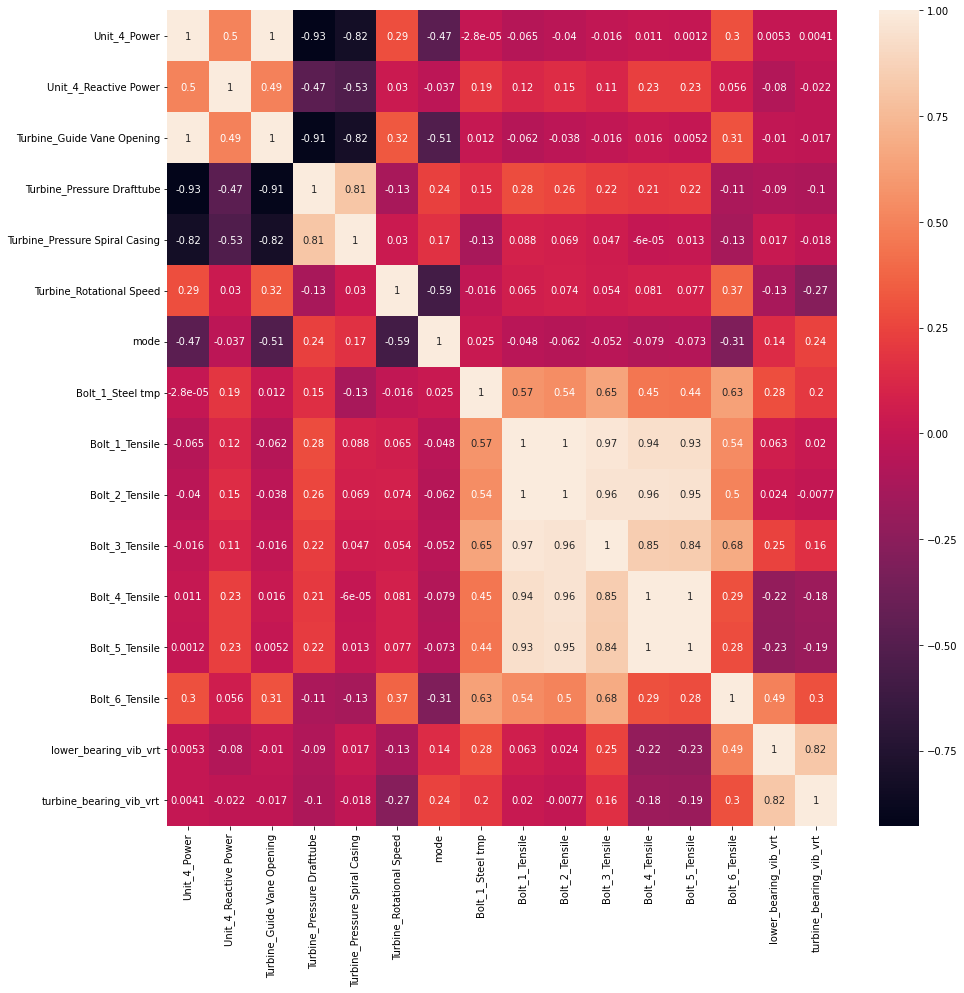

In [17]:
fig = plt.figure(figsize=(15,15))


sns.heatmap(dfff.corr(),annot=True)

In [18]:
cols = ['Unit_4_Power', 'Unit_4_Reactive Power', 'Turbine_Guide Vane Opening',
       'Turbine_Pressure Drafttube', 'Turbine_Pressure Spiral Casing',
       'Turbine_Rotational Speed', 'mode']
X = dfff[cols]
X.shape

(1874087, 7)

In [19]:
# targets
y = dfff[['Bolt_1_Tensile', 'Bolt_2_Tensile', 'Bolt_3_Tensile', 'Bolt_4_Tensile',
       'Bolt_5_Tensile', 'Bolt_6_Tensile']]

In [20]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=42)
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((1499269, 7), (1499269, 6), (374818, 7), (374818, 6))

In [29]:
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_absolute_percentage_error
from joblib import dump, load


In [30]:
def eval_and_save_model(model):
    for col in y_train.columns:
        train = y_train[col]
        test = y_test[col]
        model.fit(X_train,train)
        # err = mean_absolute_percentage_error(model.predict(X_test),test)
        err = model.score(X_test,test)
        print(col,err)
        dump(model, f'{col}.joblib')


In [31]:
model = GradientBoostingRegressor(learning_rate=.5,n_estimators=40,max_depth=7)
eval_and_save_model(model)

Bolt_1_Tensile 0.9939128088825034
Bolt_2_Tensile 0.9955078897325101
Bolt_3_Tensile 0.9857233585121613
Bolt_4_Tensile 0.9995476105623072
Bolt_5_Tensile 0.9996830972012065
Bolt_6_Tensile 0.9709620906004522
